In [26]:
import os 
path = os.getcwd()
%matplotlib inline
if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/paths/uib.ipynb
    %run /Home/siv30/wad005/master/GRB/src/read_matlab_background.ipynb
    %run /Home/siv30/wad005/master/GRB/src/convert_erg.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb # Mac paths
    %run /Users/andreas/phys/master/GRB/src/read_matlab_background.ipynb
    %run /Users/andreas/phys/master/GRB/src/convert_erg.ipynb


all UiB paths loaded


/Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None


<Figure size 800x500 with 0 Axes>

/Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None



all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!


In [11]:
T0 = datetime.fromisoformat('2019-03-05T13:05:19.816')
df = harvest_data(fn='2019_3_5_13_3_48',T0='2019-03-05T13:05:19.816')
tus = df['tus'].to_numpy()
len(tus),type(tus)

(87656, numpy.ndarray)

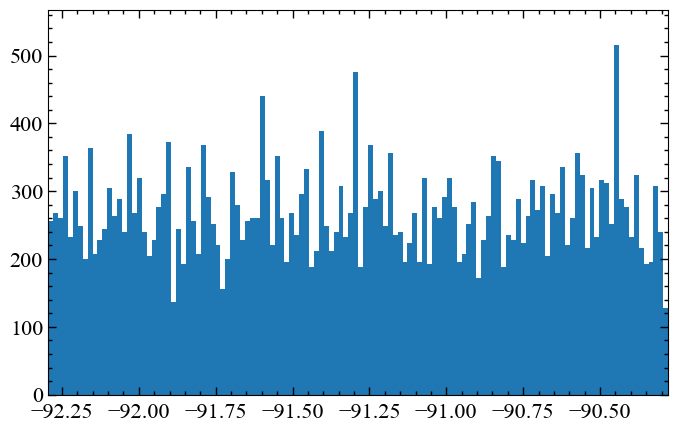

In [7]:
dt = 0.016
i=find_nearest(tus,-2)
bins_bg = np.arange(min(tus[:i]),max(tus[:i])+dt,dt)
plt.hist(tus[:i],bins=bins_bg)
plt.show()

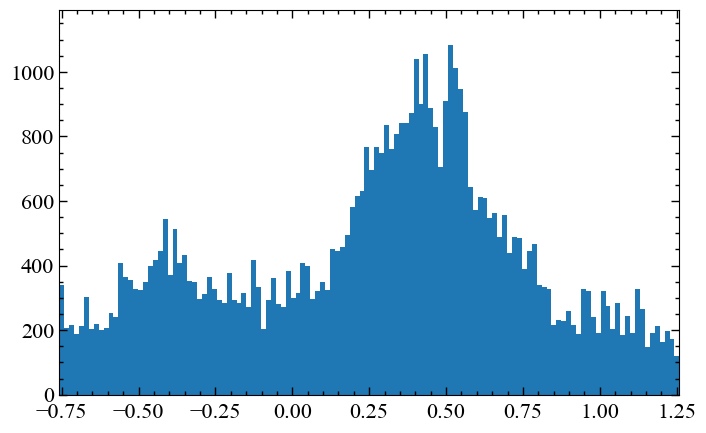

In [8]:
dt = 0.016
i=find_nearest(tus,-2)
bins_burst = np.arange(min(tus[i:]),max(tus[i:])+dt,dt)
plt.hist(tus[i:],bins=bins_burst)
plt.show()

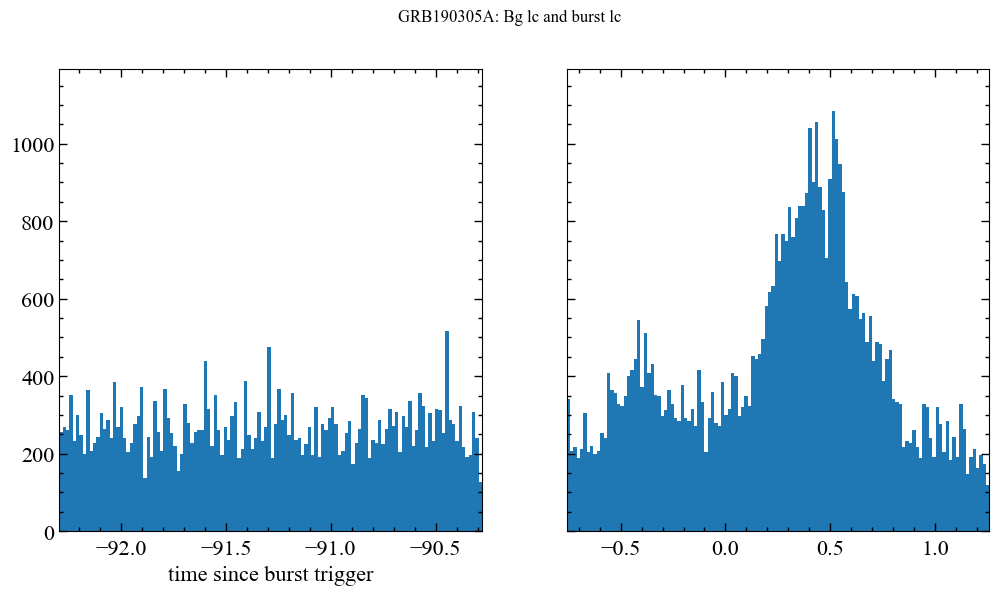

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,figsize=(12, 6))
fig.suptitle('GRB190305A: Bg lc and burst lc')
ax1.hist(tus[:i],bins=bins_bg)
ax2.hist(tus[i:],bins=bins_burst)
ax1.set_xlabel("time since burst trigger")
plt.show()

In [12]:
print("burst T0: ", T0)
print("bg T0:",T0-timedelta(seconds=90))
print("iss lon,lat position (at T0): ",84.887, -51.772)
print("iss lon,lat position (at bg): ", 75.929,-51.595)
print("location: indian ocean")
print("travelled ~620 km from bg to burst (~90 sec)")

burst T0:  2019-03-05 13:05:19.816000
bg T0: 2019-03-05 13:03:49.816000
iss lon,lat position (at T0):  84.887 -51.772
iss lon,lat position (at bg):  75.929 -51.595
location: indian ocean
travelled ~620 km from bg to burst (~90 sec)


# Calibreating energy channels

In [21]:
#need to truncate the df to the bg
i = find_nearest(tus,-2)
df_bg = df.iloc[:i]
df_bg

,year,month,day,hour,minute,second,energy_ch,dau,det,datetime,tus
0,2019,3,5,13,3,47.521628,1397,1,2,2019-03-05 13:03:47.521628443,-92.294372
43828,2019,3,5,13,3,47.521628,1397,1,2,2019-03-05 13:03:47.521628443,-92.294372
65742,2019,3,5,13,3,47.521628,1397,1,2,2019-03-05 13:03:47.521628443,-92.294372
21914,2019,3,5,13,3,47.521628,1397,1,2,2019-03-05 13:03:47.521628443,-92.294372
1,2019,3,5,13,3,47.522101,84,1,2,2019-03-05 13:03:47.522100556,-92.293899
...,...,...,...,...,...,...,...,...,...,...,...
74180,2019,3,5,13,3,49.53039,35,2,1,2019-03-05 13:03:49.530390389,-90.285610
52267,2019,3,5,13,3,49.530741,149,1,1,2019-03-05 13:03:49.530740972,-90.285259
8439,2019,3,5,13,3,49.530741,149,1,1,2019-03-05 13:03:49.530740972,-90.285259
74181,2019,3,5,13,3,49.530741,149,1,1,2019-03-05 13:03:49.530740972,-90.285259


In [15]:
coefs = get_coefs(T0)
coefs

{'dau_1_det_1': {'a': 0.005056, 'b': 7.8833, 'c': 57.8059},
 'dau_1_det_2': {'a': -0.000256, 'b': 17.7142, 'c': 15.1718},
 'dau_1_det_3': {'a': 0.003538, 'b': 9.21618, 'c': 49.5092},
 'dau_2_det_1': {'a': 0.007493, 'b': 4.6849, 'c': 130.9879},
 'dau_2_det_2': {'a': 0.004786, 'b': 10.5899, 'c': 42.4091},
 'dau_2_det_3': {'a': 0.005455, 'b': 8.3616, 'c': 48.51079},
 'dau_3_det_1': {'a': -0.001532, 'b': 21.1949, 'c': -10.2295},
 'dau_3_det_2': {'a': -0.003828, 'b': 25.3863, 'c': -9.64767},
 'dau_3_det_3': {'a': -0.001969, 'b': 21.9612, 'c': 7.89434},
 'dau_4_det_1': {'a': 0.003962, 'b': 10.3366, 'c': 58.0892},
 'dau_4_det_2': {'a': 0.004284, 'b': 11.1893, 'c': 23.54682},
 'dau_4_det_3': {'a': 0.002769, 'b': 11.8369, 'c': 18.7551}}

In [24]:
erg,dau,det = df_bg['energy_ch'].to_numpy(),df_bg['dau'].to_numpy(),df_bg['det'].to_numpy()
len(erg),len(dau),len(det)

(33760, 33760, 33760)

In [29]:
#keV,cal_abc = convert_erg(erg,dau,det,T0)

In [28]:
def convert_erg(erg,dau,det,T0):
    """should specify the T0 for the event"""
    
    """keV = (A*CHANNEL^2) + (B*CHANNEL) + C"""
    keV_list = []
    cal_abc = []
    dau_det_coefs = get_coefs(T0)
    for i in np.arange(0,len(erg)):
        dau_val = dau[i]
        det_val = det[i]
        erg_val = erg[i]
        

        a = dau_det_coefs["dau_{}_det_{}".format(dau_val,det_val)]["a"]
        b = dau_det_coefs["dau_{}_det_{}".format(dau_val,det_val)]["b"]
        c = dau_det_coefs["dau_{}_det_{}".format(dau_val,det_val)]["c"]
        cal_abc.append([a,b,c])
        
        keV = a*erg_val**2 + b*erg_val + c
        keV_list.append(keV)
        
    return np.array(keV_list), np.array(cal_abc)